In [1]:
import numpy as np
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8bf87e11514d4d76b858781d5b9e9c18 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='V2QXLrv7i6Q7pG-879QykGsMyUQGqtZ7cC7VdukMSHl8',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_8bf87e11514d4d76b858781d5b9e9c18.get_object(Bucket='predictlifeexpectancy-donotdelete-pr-hmxssflzurfu6f',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
training_set = pd.read_csv(body)
training_set.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
training_set.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [3]:
training_set.Country = pd.factorize(training_set.Country)[0]
training_set.Country = training_set.Country.astype(str)
print(training_set.Country.head(15))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
Name: Country, dtype: object


In [4]:
training_set.Status = pd.factorize(training_set.Status)[0]
training_set.Status = training_set.Status.astype(str)
print(training_set.Status.head(15))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
Name: Status, dtype: object


In [5]:
training_set.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [6]:
convert_dict = {'Country': np.int64, 
                'Status': np.int64
               } 
  
training_set = training_set.astype(convert_dict) 
print(training_set.dtypes)

Country                              int64
Year                                 int64
Status                               int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


In [7]:
training_set.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
training_set.dropna(subset=['Life expectancy '],inplace = True)
training_set.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [9]:
training_set['Polio'].fillna(method="ffill",inplace = True)
training_set['Diphtheria '].fillna(method="ffill",inplace = True)
training_set.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                                0
Total expenditure                  226
Diphtheria                           0
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [10]:
training_set[' thinness  1-19 years'].fillna(method="bfill",inplace = True)
training_set[' thinness 5-9 years'].fillna(method="bfill",inplace = True)
training_set[' BMI '].fillna(method="bfill",inplace = True)
training_set.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  226
Diphtheria                           0
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    160
Schooling                          160
dtype: int64

In [11]:
training_set['Alcohol'].fillna(training_set['Alcohol'].median(skipna = True),inplace = True)
training_set['Total expenditure'].fillna(training_set['Total expenditure'].median(skipna = True),inplace = True)
training_set['Income composition of resources'].fillna(training_set['Income composition of resources'].median(skipna = True),inplace = True)
training_set['Schooling'].fillna(training_set['Schooling'].median(skipna = True),inplace = True)
training_set.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources      0
Schooling                            0
dtype: int64

In [12]:
training_set['Hepatitis B'].fillna(training_set['Hepatitis B'].mean(skipna = True),inplace = True)
training_set['GDP'].fillna(training_set['GDP'].mean(skipna = True),inplace = True)
training_set['Population'].fillna(training_set['Population'].mean(skipna = True),inplace = True)
training_set.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
def plotFeatures(col_list,title):
    plt.figure(figsize=(20,20))
    i = 0
    for col in col_list:
        if col == "Life expectancy ":
              continue
        i+=1
        plt.subplot(11,2,i)
        plt.plot(training_set[col],training_set['Life expectancy '],marker='.',linestyle='none')
        plt.title(title % (col)) 
        plt.xlabel(col)
        plt.ylabel("Life Expectancy")
        plt.tight_layout()

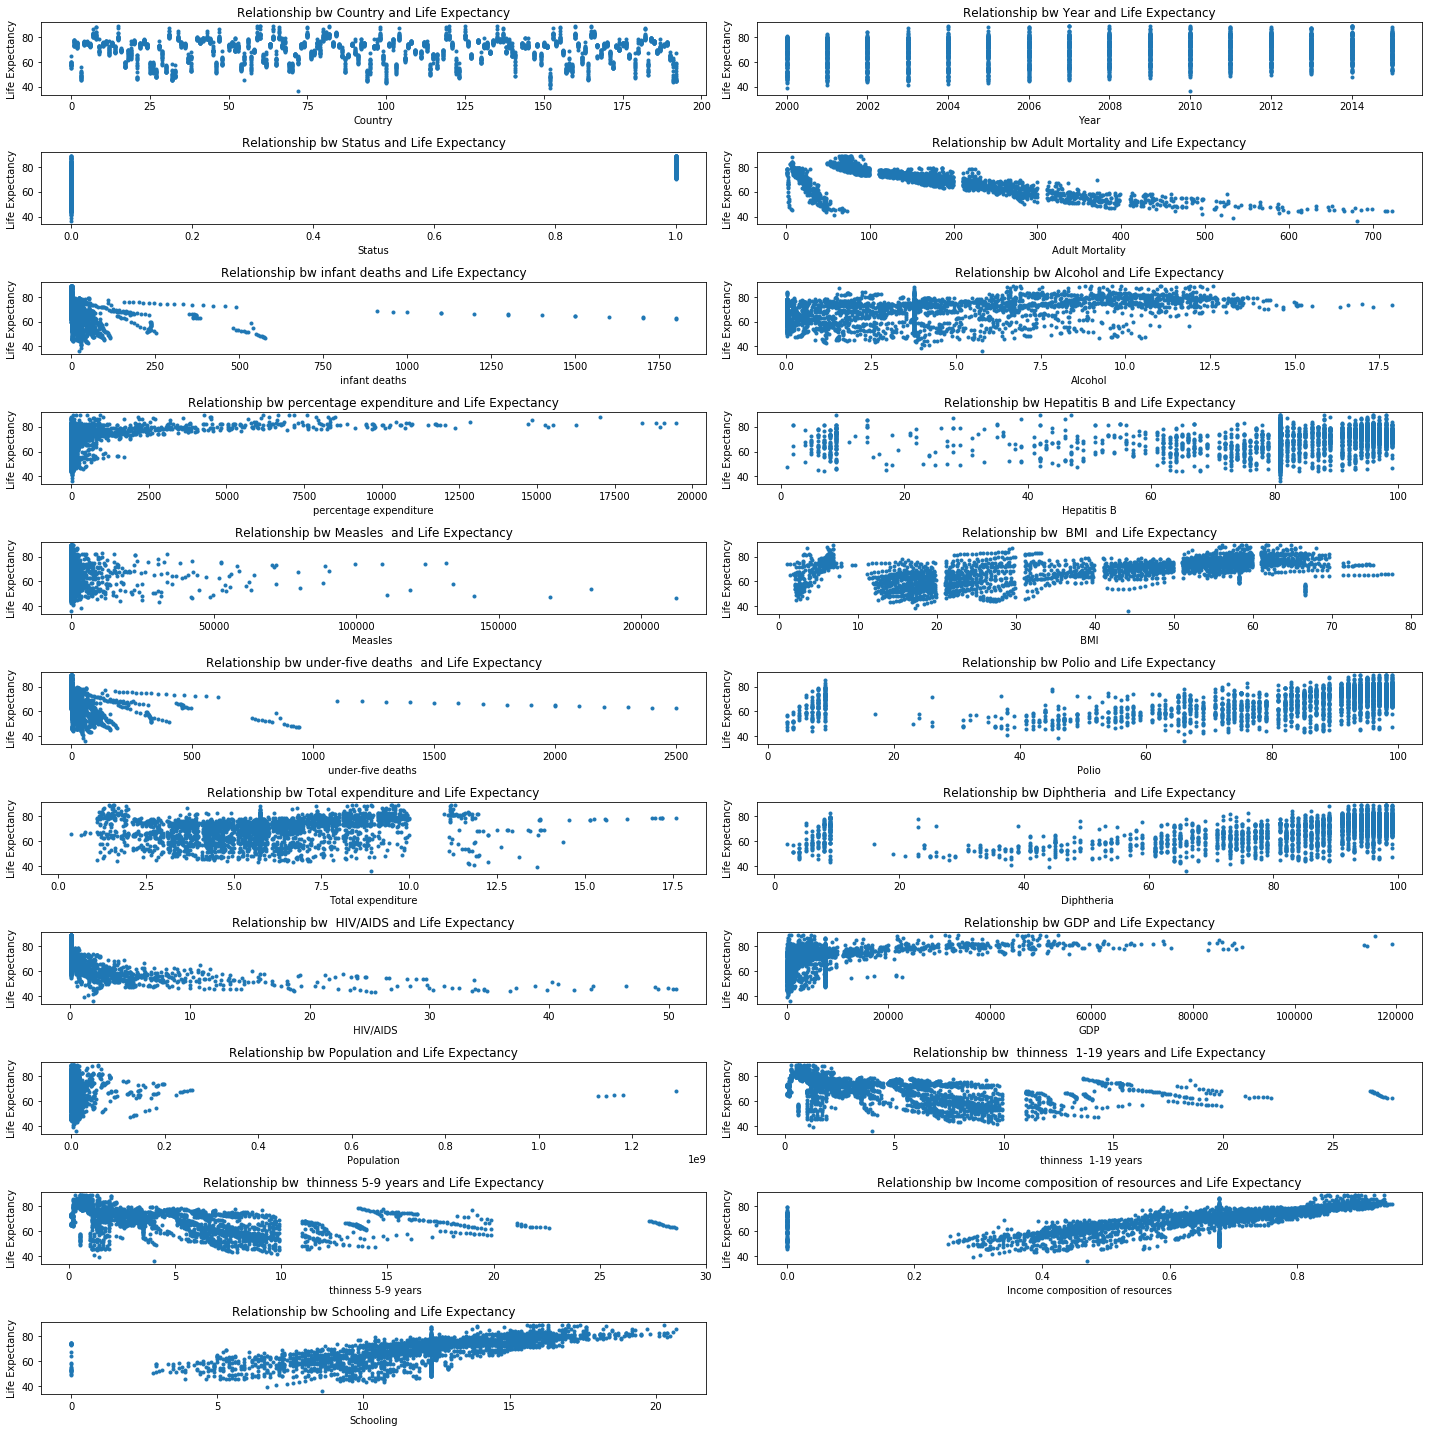

In [14]:
plotFeatures(training_set,"Relationship bw %s and Life Expectancy")

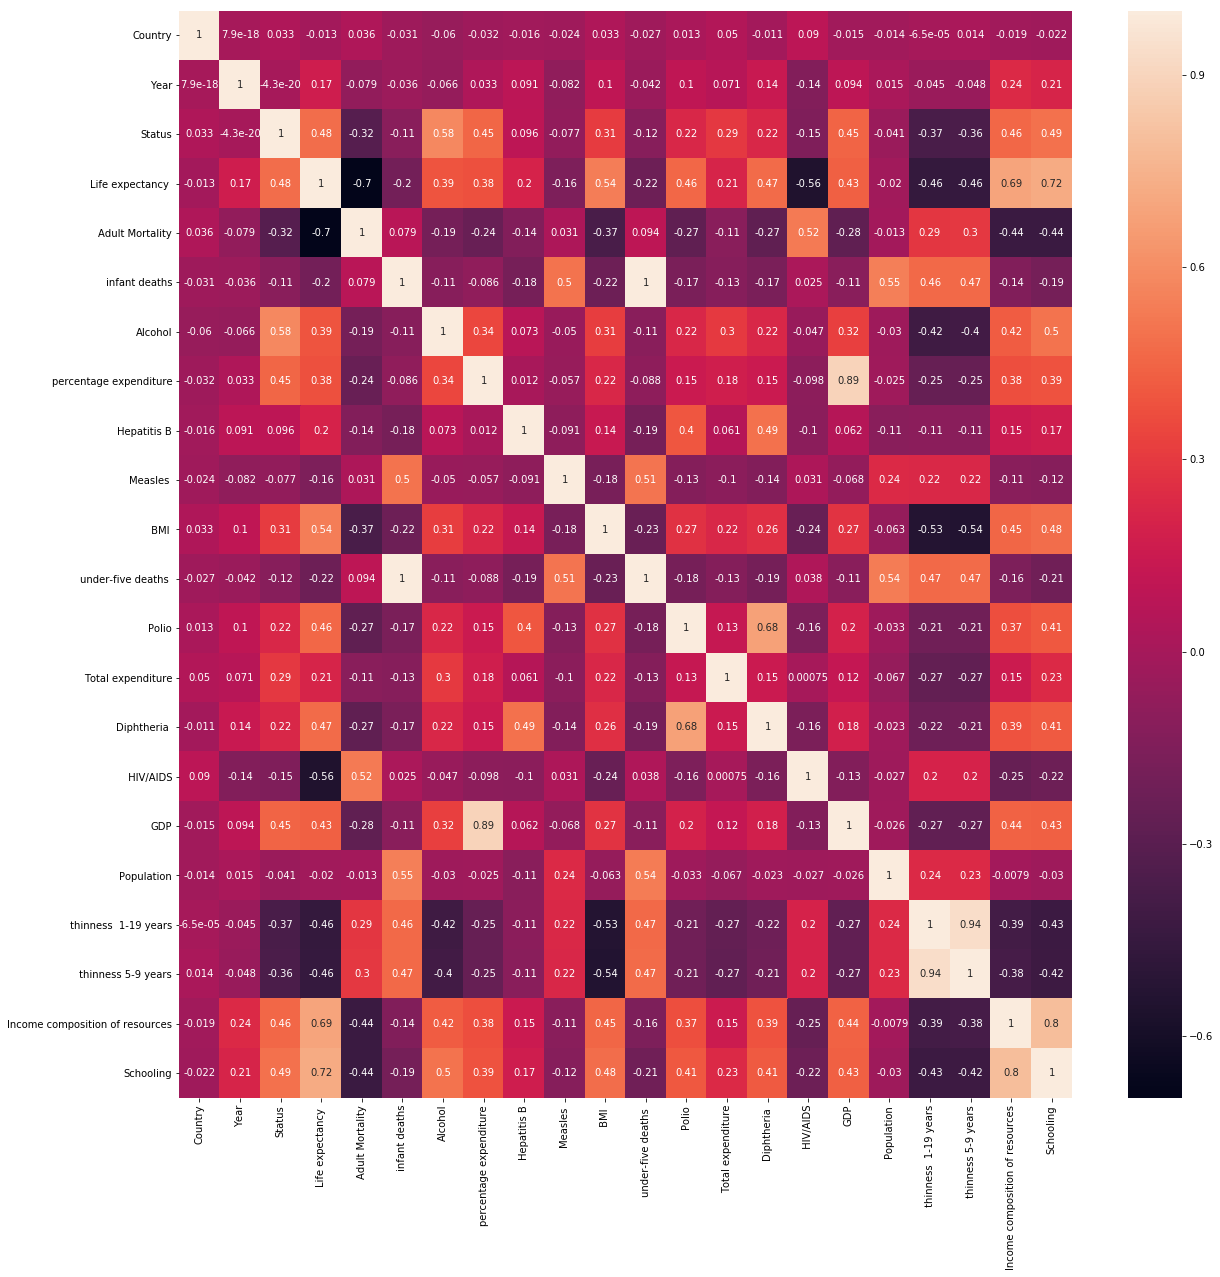

In [15]:
import seaborn as sn
plt.subplots(figsize = (20,20))
corrMatrix = training_set.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [16]:
y = training_set['Life expectancy ']
X = training_set.drop(['Life expectancy '],axis = 1)
print(y)

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
5       58.8
6       58.6
7       58.1
8       57.5
9       57.3
10      57.3
11      57.0
12      56.7
13      56.2
14      55.3
15      54.8
16      77.8
17      77.5
18      77.2
19      76.9
20      76.6
21      76.2
22      76.1
23      75.3
24      75.9
25      74.2
26      73.5
27      73.0
28      72.8
29      73.3
        ... 
2908    63.0
2909    59.2
2910    58.2
2911    58.0
2912    57.4
2913    55.7
2914    52.6
2915    58.0
2916    49.3
2917    47.9
2918    46.4
2919    45.5
2920    44.6
2921    43.8
2922    67.0
2923    59.2
2924    58.0
2925    56.6
2926    54.9
2927    52.4
2928    50.0
2929    48.2
2930    46.6
2931    45.4
2932    44.6
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2928, dtype: float64


In [17]:
print(X)

      Country  Year  Status  Adult Mortality  infant deaths  Alcohol  \
0           0  2015       0            263.0             62     0.01   
1           0  2014       0            271.0             64     0.01   
2           0  2013       0            268.0             66     0.01   
3           0  2012       0            272.0             69     0.01   
4           0  2011       0            275.0             71     0.01   
5           0  2010       0            279.0             74     0.01   
6           0  2009       0            281.0             77     0.01   
7           0  2008       0            287.0             80     0.03   
8           0  2007       0            295.0             82     0.02   
9           0  2006       0            295.0             84     0.03   
10          0  2005       0            291.0             85     0.02   
11          0  2004       0            293.0             87     0.02   
12          0  2003       0            295.0             87     

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

bestfeatures = SelectKBest(score_func=f_regression ,k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Column','Score']
print(featureScores)

                             Column        Score
0                           Country     0.532509
1                              Year    87.112796
2                            Status   886.155558
3                   Adult Mortality  2754.630090
4                     infant deaths   117.588189
5                           Alcohol   527.020493
6            percentage expenditure   499.506442
7                       Hepatitis B   127.793123
8                          Measles     74.512586
9                              BMI   1211.421294
10               under-five deaths    152.442008
11                            Polio   785.928820
12                Total expenditure   134.435624
13                      Diphtheria    851.689403
14                         HIV/AIDS  1313.073691
15                              GDP   665.831564
16                       Population     1.127807
17             thinness  1-19 years   792.575365
18               thinness 5-9 years   768.233268
19  Income compositi

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print(mae)

3.8979302848271913


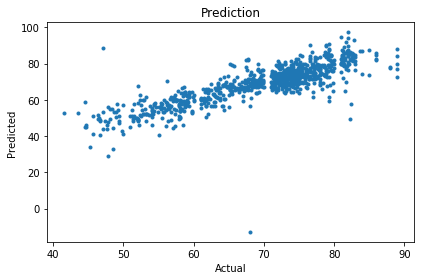

In [23]:
plt.plot(y_test,y_pred,marker='.',linestyle='none')
plt.title("Prediction") 
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()

In [24]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-05 09:12:59,580 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [25]:
wml_credentials={
  "apikey": "2FIIGIfL_-C3BRcfnqHa8vFR1IT12TxuciZjFaqnyYCC",
  "instance_id": "25029da2-3957-4df4-aebb-afdb8c51c0cf",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [26]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [27]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Kushal", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "kushalmaster8@gmail.com", 
               client.repository.ModelMetaNames.NAME: "training_set"}

In [28]:
model_artifact = client.repository.store_model(model, meta_props=model_props)

In [29]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [30]:
published_model_uid

'd970a125-e791-4b68-a413-952e43214f39'

In [31]:
deployment = client.deployments.create(published_model_uid, name="training_set")



#######################################################################################

Synchronous deployment creation for uid: 'd970a125-e791-4b68-a413-952e43214f39' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='d9a7bd58-e58e-4de3-8dbf-607938a593f1'
------------------------------------------------------------------------------------------------




In [32]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [33]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/25029da2-3957-4df4-aebb-afdb8c51c0cf/deployments/d9a7bd58-e58e-4de3-8dbf-607938a593f1/online'